In [1]:
%matplotlib inline

In [2]:
import sys
import math
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Taylor series. Computing Function Value Approximations

## Abstract
The following Notebook aims to explain what is Function approximation, Why do we need it and how it is done with the help of Taylor series. All this is illustrated with Python code. SymPy and Mathplotlib Python packages are used for convenience and illustrating function plots for some visual feedback.

### What is "function approximation"?

Modern day engineering is using computer simulations more than ever before. Using computer algorithm to recreate real world is not so simple task. Physics forces are often described by complicated functions that combined in a complex systems are almost impossible to solve or really computationally heavy. 

So how are computer scientists and engineers dealing with this problem - they approximate.
By gathering large ammounts of test data, scientists are searching for models that closely replicate what the results from real-world measurmets are. The fundamentals of such engineering approximations are based on mathematical function approximation.

[Function approximation](https://en.wikipedia.org/wiki/Function_approximation) is a way to mimic a mathematical function that is not well researched or completelly unknown by using an already defined and well known one. 

### Why can't we compute all functions numerically?

Most of the laws of Mechanics are expressed by differential equations. Differentiating by itself means that we take a given function and split it to infinitely small partitons. The difference between two infinitely small partitions is providing us with the rate of change for the function of interest in particular moment. 
A good example for diferential equation could be the all well known Newton's second law: 

**_The rate of change of momentum of a body is directly proportional to the force applied, and this change in momentum takes place in the direction of the applied force._**
$$F = m \frac {dV}{dt} = ma $$

where **F** is the net force applied, **m** is the mass of the body, and **a** is the body's acceleration.
So what does $\frac {dV}{dt}$ stands for? It marks the rate of chagne of velocity with respect to time, or in more simple words - acceleration. This is known as first the derivative of velocity. 
At this momment you might ask yoursef: "How are derivatives calculated?"

First we will need to know an easy formula for computing the derivative of any given function. With the given example above suppose we need to calculate the acceleration that is betrween two given momments in time $t_0$ and $t_1$
$$ a = \frac {dV}{dt} = \frac {V(t_0 + t_1) - V(t_0)}{(t_0 + t_1) - t_0}$$

In order for this calculation to be more precise we will need to choose the two moments in time to be so close to each other that their diference should be infinetely small, so that $t_1$ approaches $t_0$. In theory suchn diference should be infenately small number such that almost equal to zero. Chosing such diference will transform the equation above to:
$$ a = \lim_{t_1 \to t_0} \frac {V(t_0 + t_1) - V(t_0)}{(t_0 + t_1) - t_0}=  \frac{Vt_1}{t_1} $$

Turns out in practice, the derivative of a function is calculating by substrancting two values of the function that are really really close to each other. In computing practice we can only have certain approximation of this infinitely small number, because of hardware limitations. Such number in computing is known as _epsilon_. In python epsilon's value as follows:

In [3]:
sys.float_info.epsilon

2.220446049250313e-16

Computing two function values evaluated at diference approaching zero and equal to _epsilon_ shows that in practice we cant't have infinity. We are always approximating when dealing with really small values, but we are approximating really close to the original.

## Ways of approximation a function near a given point?

So far we saw what approximation means and how it is used in a very simple example. But wait - there's more! In real-world practice, approximation takes plece in so many cases. You can aproximate an unkwnown function by self-learning algorhytms. Or you can use well defined and explored mathematical formulas to recreate the output of a function you want to approximate.

Suppose you are interested in the values of some function $f(x)$ for $x$ near some fixed point $x_0$. The function is too complicated to work with directly. So we will need to find an approximation for this function and describe it with a simpler one - let's name it $F(x)$. We might even search fot the simplest function that can approximate our originial one at a given point. 

#### Constant function approximation
The simplest functions are those that are constants. This means that our simplest approximation will be a constant function. 
It will have the form $F(x) = A$. To ensure that $F(x)$ is a good approximation of $f(x)$ near some point $x_0$, functions evaluated at that point must be equal: $F(x_0) = f(x_0)$.

We can ilustrate this example by plotting the function $f(x) = \sqrt[3]x$ and it's approximation at $x = 3$

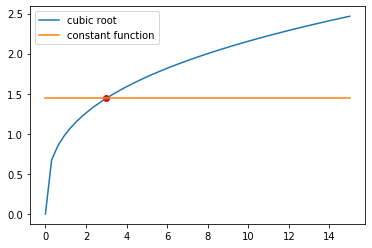

In [4]:
cubic_root = lambda x: x ** (1. / 3)
x_values = np.linspace(0, 15)
y_values = cubic_root(x_values)

constant_func = lambda x: 0*x + cubic_root(3)
x_constant_plot = np.linspace(0, 15)
y_constant_plot = constant_func(x_constant_plot)

plt.plot(x_values, y_values, label='cubic root')
plt.plot(x_constant_plot, y_constant_plot, label='constant function')
plt.scatter(3, constant_func(3), c ='red')
plt.legend()
plt.show()

As we can see - we have a perfect approximation! Sadly it is valid at only one given point where $f(x_0) = F(x_0) = 3$. The more we move away from our particular point - the more these two function diverge from each other. This makes our approximation not very usefull in the general case.

We can improve the plotting code listed above by parameterizing the plotting function. 

In [5]:
def plot_func_constatnt_approx(func_to_approx, func_name, points_of_equality, range_min = 0, range_max = 15):
    func_to_approx = np.vectorize(func_to_approx)
    x_values = np.linspace(range_min, range_max)
    y_values = func_to_approx(x_values)
    
    plt.plot(x_values, y_values, label=func_name)
    
    constant_func = lambda x: 0*x + func_to_approx(points_of_equality[0])
    x_constant_plot = np.linspace(range_min, range_max)
    y_constant_plot = constant_func(x_constant_plot)
    
    plt.plot(x_constant_plot, y_constant_plot, label='constant function')
    
    for p in points_of_equality:
        plt.scatter(p, constant_func(p), c='red')
    
    plt.legend()
    plt.show()

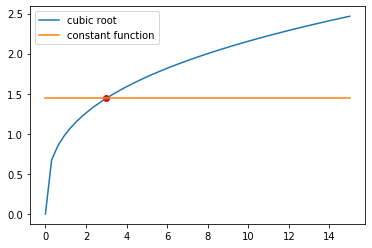

In [6]:
plot_func_constatnt_approx(lambda x: x ** (1. / 3), 'cubic root', [3])

The result is identical, so let's try that with a function that can be approximated by a constant one but in more than one point.

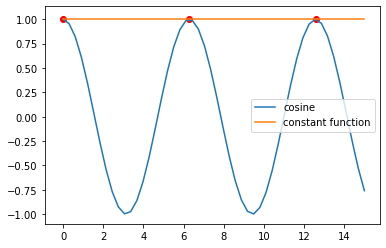

In [28]:
plot_func_constatnt_approx(math.cos, "cosine", [0, 2*math.pi, 4*math.pi])

How do we improve our approximations? 
Another good approximation of a function near a given point could be the tangent of the function at that point. It is better than the constant one, because it follows the increase and the decrease of the original function.

#### Approximation of a function by it's slope.

Developing a better approximation can be to define a linear function that will follow our target one, inseatd of a constant one that is approximating it only near the point of equality. To do so is to allow $F(x)$
to be of the form $A + Bx$. To ensure that $F(x)$ is a good approximation for $x$ near $x_0$ we choose constants $A$ and $B$ to be such that $f(x_0) = F(x_0)$ and $f'(x_0) = F'(x_0)$


$$F(x) = A + Bx \Longrightarrow F(x_0) = A + Bx_0 = f(x_0)$$

$$F'(x) = B     \Longrightarrow F'(x_0) =       B = f'(x_0)$$

Substituting $B = f'(x_0)$ into $f(x_0)$ gives us $f(x_0) = A + x_0f'(x_0) \Longrightarrow A = f(x_0) - x_0f'(x_0)$. Now lets go back to our $F(x_0)$ and replace all the things we've found:

$$F(x) = f(x_0) - x_0f'(x_0) + xf'(x_0) = f(x_0) + f'(x_0)(x-x_0)$$

In order to solve the upper equation we will need a function to calculate the first derivative.

In [8]:
def calculate_first_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the first derivative of the specified function
    at the given point
    """
    derivative = (function(point + precision) - function(point)) / precision
    return derivative

Having a function that calculates the first derivative, It's relatively easy to plot the results of the above equation. We can try that with cubic root and cosine.

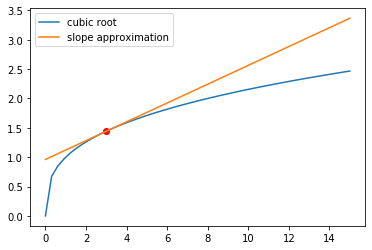

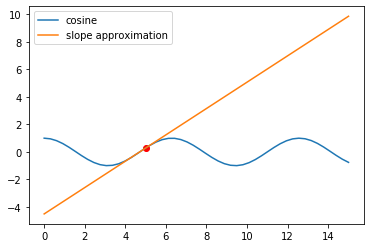

In [31]:
def plot_slope_approximation(func, point, function_name):
    func = np.vectorize(func)

    approx = lambda x: func(point) + (calculate_first_derivative_at_point(func, point)*(x - point))

    xPoints = np.linspace(0, 15)
    yPoints = func(xPoints)

    plt.plot(xPoints, yPoints, label=function_name)
    plt.plot(xPoints, approx(xPoints), label = 'slope approximation')
    plt.scatter(point, approx(point), c = 'red')
    plt.legend()
    plt.show()
    
plot_slope_approximation(lambda x: x ** (1. / 3), 3, 'cubic root')

plot_slope_approximation(math.cos, 5, 'cosine')

Observing the plots, It's easily noticable that we have approximated the function better than the first try, but it is not close enough, because we are getting closer to our target functions in only a certain region.
There is a way to improve this approximation.

### The quadratic approximation

We have previously approximated our target wit function similar to $F(x) = A + Bx$. We can do better approximation if we add another term to our function so it will look like $F(x) = A + Bx + Cx^2$. 
To approximate our target function we will need to choose $F(x)$ such that $F(x_0) = f(x_0)$, $F(x_0)' = f(x_0)'$ amd $F(x_0)'' = f(x_0)''$

$$F(x_0)  = A + Bx_0 + C x_0^2 = f(x_0)$$

$$F(x_0)' = B + 2Cx_0 = f'(x_0)$$

$$F(x_0)'' = 2C = f(x_0)''$$

From the third equation, it is clear that $$C = \frac{1}{2}f''(x_0) \Longrightarrow B = f'(x_0) -2Cx_0 = f'(x_0) - f''(x_0)x_0$$

$$\Longrightarrow A = f(x_0) - Bx_0 - Cx_0^2 = f(x_0) - x_0(f'(x_0)- 2Cx_0) - x_0^2(\frac{1}{2}f''(x_0)) = f(x_0) - x_0[f'(x_0) - x_0f''(x_0)] - \frac{1}{2}x_0^2f''(x_0)$$

From the above equations we can build $F(x)$:

$$F(x) = f(x_0) - f'(x_0)x + \frac{1}{2}x_0^2f''(x_0)$$

$$+ f'(x_0)x - f''(x_0)x_0x$$

$$+ \frac{1}{2}f''(x_0)x^2$$

$$= f(x_0) + f'(x_0)(x - x_0) + \frac{1}{2}f''(x_0)(x - x_0)^2$$

The final approximation looks like this:

$$F(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{1}{2}f''(x_0)(x - x_0)^2$$

This is called a quadratic approximation. It is better than the two mentioned before and this can be illustrated by plotting it. But first we will need a way to calculate the second derivative of a function. 
An easy and robust way to do that is by using Python's symbolic library SymPy.

Here is a brief example how derivatives can be expressed and evaluated via SymPy:

In [10]:
x = sym.symbols('x')

func = sym.cos
dx = sym.diff(func(x), x)

print(f'{func(x)}\' = {dx}')
print(f'-sin(pi/2) = {sym.N(dx.subs(x, math.pi/2))}')


cos(x)' = -sin(x)
-sin(pi/2) = -1.00000000000000


We can check the assumption from above with math library.

In [11]:
print(-math.sin(math.pi/2))

-1.0


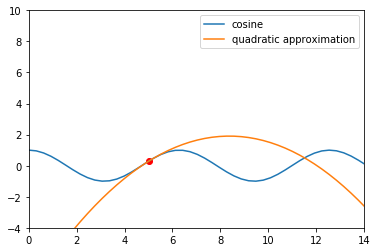

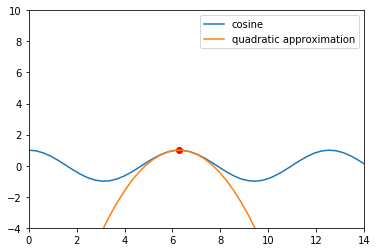

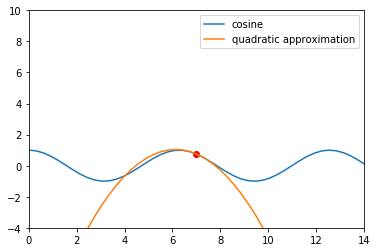

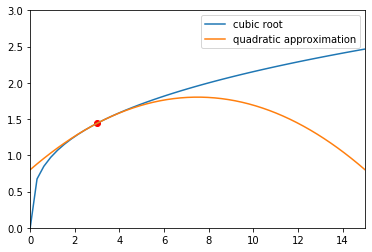

In [12]:
def plot_quadratic_approximation_at_point(f, point, function_name, plot_range):
    x = sym.symbols('x')
    func = sym.lambdify(x, f(x), 'numpy')
    
    x_points = np.linspace(0,15)
    y_points = func(x_points)
    
    plt.plot(x_points, y_points, label= function_name)
    
    x, p = sym.symbols('x p')
    
    approx = f(p) + sym.diff(f(p), p)*(x - p) + (1 / 2) * (sym.diff(f(p), p, 2)) * ((x - p)**2)
    
    approx = approx.subs(p, point)
    
    approx = sym.lambdify(x, approx, 'numpy') 
    
    y_approx = approx(x_points)
    plt.plot(x_points, y_approx, label = 'quadratic approximation')
    plt.scatter(point, approx(point), c='red')
    plt.legend()
    plt.axis(plot_range)
    plt.show()

plot_quadratic_approximation_at_point(sym.cos, 5, 'cosine', [0, 14,-4, 10])

plot_quadratic_approximation_at_point(sym.cos, 2* math.pi, 'cosine', [0, 14,-4, 10])

plot_quadratic_approximation_at_point(sym.cos, 7, 'cosine', [0, 14,-4, 10])

cubic_root = lambda x: x ** (1. / 3)
plot_quadratic_approximation_at_point(cubic_root, 3, 'cubic root',[0,15,0,3])

We are observing that the quadratic function we've just found is replicating our target function slightly better than approximating it with slope. The red dod indicates where the target function and our approximation are equal. The region around that point of equality is so well approximated, that on the graphs it looks like are plotting on the target function itself. 

So far we've added a new term to our equation with the consequential power of $x$ - which is $2$. At that time you might ask yourself "What will happen if we add a third one?". 

### Approximating with polynomials

The similarity between approximating with a function's slope and a quadratic function is that both the approximation funtions are polynomials. In fact we can approximate even better by adding more terms. The beauty of polynomials is that they are easy to work with. If you add another term it's relatively easy to solve the equation so that the new term will improve the approximation. 

But how are we sure that the new term will improve the approximation? The answer is: derivatives. 

### What does first derivative mean for a function 

By definition:

"The derivative of a function of a real variable measures the sensitivity to change of the function value (output value) with respect to a change in its argument (input value)."
In other words, the first derivative indicates how the function changes depending on it's input variable.

Suppose we have the function $f(x) = 3x^2 + 2x + 1$. We can plot it and show with an example how a first derivative is calculated. Analytically a first derivative is calculated by substracting two function evaluations that are really close to each other. But for the sake of explanation we will substract evaluation at two points that are not infinatelly close to each other. 

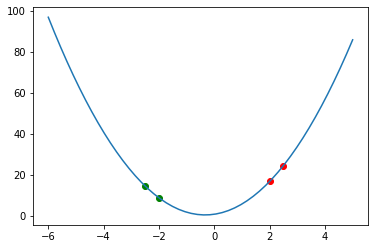

In [13]:
x = sym.symbols('x')

f = 3*(x**2) + 2*x + 1

lambdified = sym.lambdify(x, f, 'numpy') 

x_points = np.linspace(-6, 5)
y_points = lambdified(x_points)

plt.scatter(2, lambdified(2), c ='red')
plt.scatter(2.5, lambdified(2.5), c ='red')

plt.scatter(-2, lambdified(-2), c ='green')
plt.scatter(-2.5, lambdified(-2.5), c ='green')

plt.plot(x_points, y_points)
plt.show()

Substracting $f(2.5) = f(2)$ will give us the rate of change of $f(x)$ in this region. The diference between the two points is for illustration purpose. If we calculate it we will find out if the function is increasing or decreasing depending on the result's sign.

In [14]:
print(lambdified(2.5) - lambdified(2))

print(lambdified(-2) - lambdified(2.5))

7.75
-15.75


As seen on the plot, the function is increasing and that is proved by positive sign of the calculation above, the same case is decreasing for the negative sign. We can try and calculate the exact value of the first derivative by differentiating and solving for 2.2 for example. 

In [15]:
first_derivative_eq = sym.diff(f, x)

print(f'First derivative at 2 is: {first_derivative_eq.subs(x, 2)}')

print(f'First derivative at -2 is: {first_derivative_eq.subs(x, -2)}')


First derivative at 2 is: 14
First derivative at -2 is: -10


As seen above, the sign of the first derivative is showing if a function is increasing or decreasing at a certain point. But the first derivative is not the only one derivative that exists. A polynomial can have as much derivatives as far as the following statement is true: 

if $p(x)$ is a polynomial of degree $n$ (i.e. the largest exponent in the polynomial) then, 
$p^{(k)}(x) = 0$ for $k \geq n +1$. 

Taking into account this statement, means that we have two more derivatives for our quadratic polynomial. Higher order derivatives are just derivatives of the previous order derivative. This means that the second derivative is a derivative of the first e.g. $f(x)'' = (f(x)')'$ and so on. If the sign of the first derivative shows us if a function is increasing or decreasing, the second derivative is showing how fast is that function changing. 

The second derivative for $f(x) = 3x^2 + 2x + 1$ is

In [16]:
sym.diff(f, x, 2)

6

What is that number telling us? It shows that the function is changing with constant speed depending on it's argument. In other words if the argument is largly negative or positive, the function will increase or decrease with the same constant rate. If $x$ is close to $0$ the function will be less prone to change untill it reach $0$ an begin to increase after that. This explains the parabolic plot. The third and higher order derivatives are 0, which means that the rate of increase or decrease does not change with changing the function's argument. 

At that time you might ask yourself: "What's the link between polynomials, approximation and function derivatives?". 

With polynomial form it is easy to seek for a function that approximates another by adding more terms and controlling their coefficients. The derivatives helps us with calculating the target's increasing or decreasing rate so that we can set our polynomial coefficients in a manner that it will approximate our target function best.


## Improving the quadratic approximation - Taylor Polynomials

Returning back to our quadratic approximation, if we tend to add new terms with higher degree to the polynomial, we will improve our approximation function even more. Adding terms up to $n$ degree will result in polynomial such

$$ a_0 + a_1(x - x_0) + a_2(x - x_0)^2 + \ldots + a_n(x - x_0)^n$$

We are trying to approximate $F(x) \approx f(x)$ near some point $x_0$. Because $x_0$ is itself a constant, this is really just a rewriting of$A_0 + A_1x + A_2x^2 + \ldots + A_nx^n$. For example

$$a_0 + a_1(x - x_0) + a_2(x - x_0)^2 = a_0 + a_1x - a_1x_0 + a_2x^2 - 2a_2xx_0 + a_2x_0^2$$

$$= (a_0 - a_1x_0 + a_2x_0^2) + (a_1 - 2a_2x_0)x + a_2x^2$$

$$= A_0 + A_1x + A_2x^2$$

With $A_0 = a_0 - a_1x_0 + a_2x_0^2, A_1 = a_1 - 2a_2x_0$ and $A_2 = a_2$. The advantage of the form $a_0 +a_1(x - x_0) + \ldots$ is that $x - x_0$ is zero when $x = x_0$ so many of the terms  in the computation drop out. We determine the cofficients $a_i$ by the requirement for $f(x)$ and it's approximator $F(x)$ to have the same value for the first $n$ derivatives at $x = x_0$.

$$F(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)^2 + \ldots + a_n(x - x_0)^n \Longrightarrow F(x_0) = a_0 = f(x_0)$$

$$F'(x) = a_1 + 2a_2(x - x_0) + 3a_3(x - x_0)^2 + \ldots + na_n(x - x_0)^{n-1} \Longrightarrow F'(x_0) = a1 =f'(x_0)$$

$$F''(x) = 2a_2 + 3 \times 2a_3(x - x_0) + \ldots + n(n - 1)a_n(x - x_0)^{n-2} \Longrightarrow F''(x_0) = 2a_2 = f''(x_0)$$

$$ F^{(3)}(x) = 3 \times 2a_3 + \ldots + n(n - 1)(n - 2)a_n(x - x_0)^{n-3} \Longrightarrow F^{(3)}(x) = 3 \times 2a_3 = f^{(3)}(x_0)$$

$$ \vdots $$

$$ F^{(n)}(x) = n!a_n \Longrightarrow F^{(n)}(x_0) = n!a_n = f^{(n)}(x_0)$$

Here $n! = n(n-1)(n-2) \ldots1$ is called $n$ factorial. Hence 

$$ a_0 = f(x_0); a1 = f'(x_0); a2 = \frac{1}{2!} f''(x_0); a3 = \frac{1}{3!}f^{(3)}(x_0); \ldots a_n = \frac{1}{n!}f^{(n)}(x_0)$$

and the approximator, which is called the Taylor polynomial of degree $n$ for $f(x)$ at $x = x_0$, is

$$f(x) \approx f(x_0) + f'(x_0)(x - x_0) + \frac{1}{2!}f''(x_0)(x - x_0)^2  + \frac{1}{3!}f^{(3)}(x_0)(x - x_0)^3 + \ldots + \frac{1}{n!}f^{(n)}(x - x_0)^n$$

or, in summation notation, 

$$f(x) \approx \sum_{l=0}^{n} \frac{1}{l!}f^{(n)}(x_0)(x - x_0)^l$$

where we are using standard convention that $0! = 1$.

Expressing this complex equation wit Pythhon code is relatively easy with the help of SymPy library.

In [17]:
def construct_taylor_polynomial(f, point, terms_count):
    
    x = sym.symbols('x')
    
    x, p = sym.symbols('x p')
    
    approx = f(p)
    
    if terms_count > 1:
        for t in range(1, terms_count + 1 ):
            approx += (1 / math.factorial(t)) * sym.diff(f(p), p, t) * ((x - p)**t)
    
    approx = approx.subs(p, point)
    
    approx = sym.lambdify(x, approx, 'numpy') 
    
    approx = np.vectorize(approx)
    
    return approx

## Testing Taylor Series with different term count 

As it was illustrated previously, the more terms we add to the Taylor polynomial, the better the approximation will be. If we are to add infinitely more terms to the polynomial, the so called "Taylor polynomial" will turn into "Taylor series". However in practice we don't need to add terms to infinity in order to reach good approximation. We will prove that in the following section.

In the following example we will use $cos(x)$ function and we will search for approximation one by constructiong Taylor polynomial and approximatin near point `approx_point` untill we are satisfied with the accuracy of the result.

In [18]:
f_to_approx = sym.cos

approx_point = 0

x = sym.symbols('x')
lamdified_original = sym.lambdify(x, f_to_approx(x), 'numpy')

print(lamdified_original(approx_point))

taylor1 = construct_taylor_polynomial(f_to_approx, approx_point, 1)

print(taylor1(approx_point))

1.0
1


So far so good, we have created a function that gives us same result with onlt one term! Now lets try our approximation function with value different than the point we are approximating around and compare to $cos(x)$

In [19]:
print(lamdified_original(math.pi / 4))
print(taylor1(math.pi / 4))

0.7071067811865476
1


This result shouldn't surprise us. As we saw - when we are approximating with only one term, the function that we approximate with is a constant function. We can add a few more terms in order to improve the approximation. 

In [20]:
point = math.pi / 4
print(f'Value for cos(pi\\4) = {lamdified_original(point)}')
for i in range(1, 6):
    poly_approximation = construct_taylor_polynomial(f_to_approx, approx_point, i)
    print(f'Approximation with {i} terms is: {poly_approximation(point)}')

Value for cos(pi\4) = 0.7071067811865476
Approximation with 1 terms is: 1
Approximation with 2 terms is: 0.6915748624659576
Approximation with 3 terms is: 0.6915748624659576
Approximation with 4 terms is: 0.707429206709773
Approximation with 5 terms is: 0.707429206709773


The results are clear. Approximating near $x = 0$ is getting quite good results for argument of $\frac{\pi}{4}$. The accuracy is great untill the third digit after the decimal sign. Let's try with some more terms.

In [21]:
for i in range(6, 11):
    poly_approximation = construct_taylor_polynomial(f_to_approx, approx_point, i)
    print(f'Approximation with {i} terms is: {poly_approximation(point)}')

Approximation with 6 terms is: 0.7071032148228457
Approximation with 7 terms is: 0.7071032148228457
Approximation with 8 terms is: 0.7071068056832943
Approximation with 9 terms is: 0.7071068056832943
Approximation with 10 terms is: 0.7071067810719247


10 terms and we are getting great accuracy - up to 9 digits after the decimal sign! We don't need to add more terms to the polynomial.

Now lets try the same with $sin(x)$

In [22]:
f_to_approx = sym.sin

x = sym.symbols('x')
lamdified_original = sym.lambdify(x, f_to_approx(x), 'numpy')

point = math.pi / 3 

print(f'Value for sin(pi\\3) = {lamdified_original(point)}')

for i in range(1, 11):
    poly_approximation = construct_taylor_polynomial(f_to_approx, approx_point, i)
    print(f'Approximation with {i} terms is: {poly_approximation(point)}')

Value for sin(pi\3) = 0.8660254037844386
Approximation with 1 terms is: 0
Approximation with 2 terms is: 1.0471975511965976
Approximation with 3 terms is: 0.855800781565117
Approximation with 4 terms is: 0.855800781565117
Approximation with 5 terms is: 0.8662952837868344
Approximation with 6 terms is: 0.8662952837868344
Approximation with 7 terms is: 0.8660212716563722
Approximation with 8 terms is: 0.8660212716563722
Approximation with 9 terms is: 0.8660254450997809
Approximation with 10 terms is: 0.8660254450997809


We have found a way to reach good approximation near $x_0 = 0$. Thi is actually a special case of the **Taylor Series** called **Maclaurin series**. The deffinition of **Maclaurin series** is: 

*Power series that allows one to calculate an approximation of a function $f(x)$ for input values close to zero, given that one knows the values of the successive derivatives of the function at zero.*

The advantage of **Taylor series** is that we can approximate near any given point. So let's try that with code.

In [23]:
f_to_approx = sym.cos

approx_point = 4

x = sym.symbols('x')
lamdified_original = sym.lambdify(x, f_to_approx(x), 'numpy')

print(f'Approximatingcos function near {approx_point}. cos({approx_point}) = {lamdified_original(approx_point)}')

points = np.linspace(2, 6, 10)

for point in points:
    poly_approximation = construct_taylor_polynomial(f_to_approx, approx_point, 10)
    print(f'Real cos({point}) = {lamdified_original(point)}')
    print(f'Approx value({point}):{poly_approximation(point)}')
    print('\n')

Approximatingcos function near 4. cos(4) = -0.6536436208636119
Real cos(2.0) = -0.4161468365471424
Approx value(2.0):-0.41617922010897523


Real cos(2.4444444444444446) = -0.7666762487850004
Approx value(2.4444444444444446):-0.7666783875757454


Real cos(2.888888888888889) = -0.9682399588945739
Approx value(2.888888888888889):-0.9682400140372219


Real cos(3.333333333333333) = -0.9816740047110791
Approx value(3.333333333333333):-0.9816740049191552


Real cos(3.7777777777777777) = -0.8043681422486734
Approx value(3.7777777777777777):-0.8043681422486746


Real cos(4.222222222222222) = -0.4707730178330133
Approx value(4.222222222222222):-0.47077301783301206


Real cos(4.666666666666666) = -0.04570638473858134
Approx value(4.666666666666666):-0.04570638450952169


Real cos(5.111111111111111) = 0.38824102913537656
Approx value(5.111111111111111):0.3882410938760773


Real cos(5.555555555555555) = 0.7467529543114477
Approx value(5.555555555555555):0.7467556337395888


Real cos(6.0) = 0.960170

### Real world usage of Taylor series

One simple real world example of Taylor series in practice can be illustrated with how calculators calculate trigonometric functions. We all recall the trigonometric tables from highschool. They sure contain values for sines and cosines from $0^{\circ}$ up to $360^{\circ}$ amd some values in between. But we all know that we can plug many other values into our calculators. They have limited memeory, so storing tables with all the possible values that can be plugged to sine and cosine functions is not an option. In cases similar to this, appoximating with Taylor series cone in very handy. 

## Plotting approximations

Enough with explanations and numbers. Now it's the time to show some visual evidence. In the following section you will see diferent functions approximated with Taylor series with variety of terms. The most clean way to illustrate the plots is to construct an universal Python function that recieves the target function and plots it on a same plot with a number of different approximation functions depending on the term count.

In [24]:
def plot_taylor_approximations(original_function, function_name, approx_point, terms_count, values_range = [-10,10] , plot_range =[-10, 10, -10, 10]):
    f_to_approx = original_function
    
    x = sym.symbols('x')
    lamdified_original = sym.lambdify(x, f_to_approx(x), 'numpy')

    x_points = np.linspace(values_range[0],values_range[1], 1000)
    y_points = lamdified_original(x_points)
    plt.plot(x_points, y_points, label= function_name)
    plt.scatter(approx_point, f_to_approx(approx_point), c ='red')
    plt.axis(plot_range)
    
    for i in range(1, terms_count + 1):
        taylor = construct_taylor_polynomial(f_to_approx, approx_point, i)
        y_points = taylor(x_points)
        plt.plot(x_points, y_points, label= f'{i} term')

    plt.legend()
    plt.show()

Following an example wit approximating $cos(x)$ with $x_0 = 0$ and $x_0 = 2.2$. 

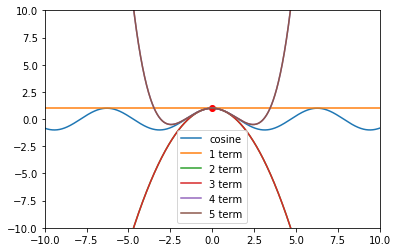

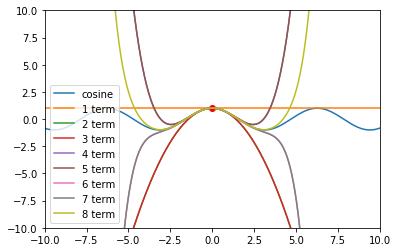

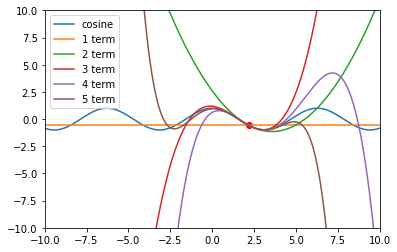

In [25]:
plot_taylor_approximations(sym.cos, 'cosine', 0, 5)

plot_taylor_approximations(sym.cos, 'cosine', 0, 8)

plot_taylor_approximations(sym.cos, 'cosine', 2.2, 5)

From the firs plot, we can suggest that at some cases approximations are so close to each other, that they overlap on the plot. The second third plots illustrate a case, where they difference is more clear.

Let's try that with some more functions.

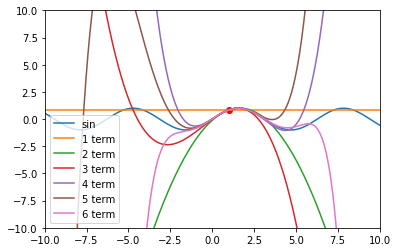

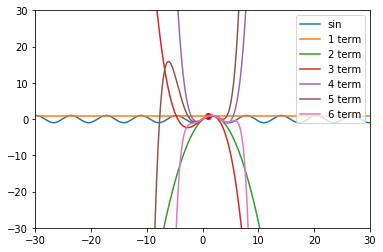

In [26]:
plot_taylor_approximations(sym.sin, 'sin', 1, 6)

plot_taylor_approximations(sym.sin, 'sin', 1, 6, values_range =[-30,30], plot_range =[-30, 30, -30, 30])

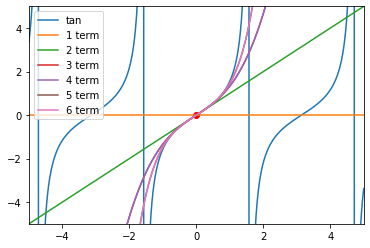

In [27]:
plot_taylor_approximations(sym.tan, 'tan', 0, 6,[-5,5], [-5,5,-5,5])

One important thing that we should point out based on the plot is that 
**Approximation functions are getting rappidly inaccurate as we step out of certain regions. These regions depend on the number of terms we have added to the series.**

## Conclusion

Funtion approximation is largely explored field. There are many more ways to approximate a given function. In real world applications, where computational resources are limited, approximations takes an important place. 

Perhaps Taylor series is one of the most common approximation method. This paper puts theory into practice by illustrating this mathematical concept with comprehensible code.

## References

1. https://www2.clarku.edu/faculty/djoyce/trig/compute.html
2. https://www.math.ubc.ca/~feldman/m120/approx.pdf
3. https://www.math.arizona.edu/~dsl/pdf/chap10.pdf
4. http://hplgit.github.io/num-methods-for-PDEs/doc/pub/approx/html/approx.html
5. https://docs.sympy.org/latest/tutorial/calculus.html